In [6]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [32]:
''' The dataset is about admision in the university based on the scores of two courese'''

def load_dataset(filename='dataset/QA.txt', delimiter=','):
        
        data = np.genfromtxt(filename, delimiter=',')
        x, y = data[:, 0:2], data[:, 2]
        return x, y

In [33]:
print(X.shape)
print(y.shape)

(118, 3)
(118,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


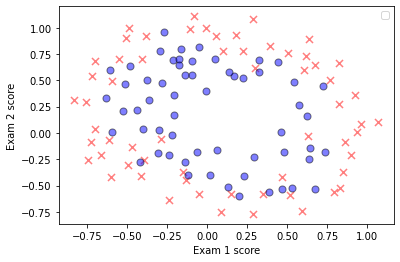

In [34]:
'''visulized_data'''
X,y=load_dataset(filename='dataset/QA.txt', delimiter=',')


alpha=0.5
neg = X[y == 0]
pos = X[y == 1]


plt.scatter(neg[:, 0], neg[:, 1], s=50, c='r', marker='x', alpha=alpha )
plt.scatter(pos[:, 0], pos[:, 1], s=50, c='b', marker='o', alpha=alpha, edgecolors='k')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [10]:
def feature_normalize(X):
    """A vectorized implementation of feature normalization.
    Arguments:
    - X: The raw input features, a 2d array of shape (m, n)
        
    Outputs:
    - X_norm: The normalized version of the input matrix
    - mu: The mean of the features
    - sigma: The std dev of the features  
    befor transformaton :
    we put axis=0 because we are going to calulate mean and std on colums not rows"""
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    return X_scaled

In [11]:
def sigmoid(X, theta):
    """ Hypothesis function for linear regression.
    
    Arguments:
        - X: Input matrix, a 2d array of shape (m, n+1)
        - theta: parameters, a 2d array of shape (n+1, 1)
        
    Output:
        - Predictions for input data (m-by-1), (100, 1) <class 'numpy.ndarray'>
    """
    
    z=X@theta
    return 1/(1+ np.exp(-z))

In [12]:
def grads(theta, X, y,alpha, num_iterations):
    """ Vectorized implementation of the gradient of logistic regression cost function.
    
    Parameters:
        - theta: Parameters, a 1d array of shape (n + 1,)
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 2d array of shape (m,)
        
    Returns:
        - gradient of the logistic regression cost function, a 2d array of shape (n + 1,)
    """
    m, n = X.shape
    
    for iteration in range(num_iterations):
        
        '''print cost every 100 iterations'''
        if iteration % 100 == 0:
            print('%4d: J(%s) = %.2f' %(iteration, theta, 
            logistic_regression_cost(theta, X, y,reg)))
          
        # compute gradients
        M=sigmoid(X, theta)-y
        grads=X.T @ M
        theta=theta-(grads*(alpha/m))
        # update parameters  
    return theta

In [13]:
def logistic_regression_cost(theta, X, y,reg):
    """ Vectorized implementation of logistic regression cost function.
    
    Parameters:
        - theta: Parameters, a 1d array of shape (n + 1,)
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 1d array of shape (m,)
        
    Returns:
        - logistic regression cost
    """
    m, n = X.shape
    K0=sigmoid(X, theta)
    M0=1-sigmoid(X,theta)
    for i in range(m):
        if y[i]==1:
            M0[i]=1
        else:
            K0[i]=1    
    M=np.log(M0)
    K=np.log(K0)
    L=(-K.T@ y )-(M.T@(1-y))
    R=(reg/2)*(theta @theta.T)
    return  (1/m) *L +R
    

In [14]:
def predict(theta, X):
    probabilities = sigmoid(X, theta)
    y_pred = [0 if p < 0.5 else 1 for p in probabilities]
    return y_pred

def accuracy(y_pred, y_true):
    return 100. * np.sum(y_pred == y_true) / len(y_true) 

In [15]:
def map_features(x1, x2, degree=1):
    """ Create polynomial features up to input degree for the input features x1 and x2.
    
    Arguments:
        - degree: the degree of polynomial features
        - x1: input feature, a 1d vector
        - x2: input feature, a 1d vector
        
    Returns:
        - A 2d matrix containing polynomial features up to input degree.
    """
    X = np.ones((x1.shape[0], 1))
    
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            f = (x1 ** (i - j)) * (x2 ** j)
            X = np.hstack((X, f.reshape(-1, 1)))
    return X

In [35]:

X = np.c_[np.ones((m, 1)), X].reshape((m, n+1))


In [48]:
degree = 8
X_poly = map_features(X[:, 1], X[:, 2], degree=degree)
print(X_poly.shape)


(118, 45)


In [52]:


# initialize theta to 0
theta = np.zeros(X_poly.shape[1])

# optimize cost function to find the optimal parameters
result = minimize(logistic_regression_cost, 
    x0=theta, 
    args=(X_poly, y.ravel(), reg), 
    method='bfgs')

# compute accuracy
theta_opt = result.x

print('cost= {:.2f}'.format(result.fun))


predictions = predict(theta_opt, X_poly)
acc = accuracy(predictions, y)
print('accuracy = {:.2f}%'.format(acc))


C:\Users\dell\AppData\Local\Temp\ipykernel_1488\1778098964.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-z))


cost= 0.17
accuracy = 91.53%


In [56]:
'''Using Scikit-learn library

Although we implemented these algorithms from scratch,
it's worth noting that we could also use a high-level python library like scikit-learn to solve this problem.
'''
from sklearn import linear_model

C = 1e10
model = linear_model.LogisticRegression(penalty='l2', C=C, fit_intercept=False)
model.fit(X_poly, y.ravel())

acc = model.score(X_poly, y) * 100

theta_opt_sk = np.array(model.coef_)

print('accuracy = {:.2f}%'.format(acc))
print(theta_opt_sk)

accuracy = 88.14%
[[  2.35755244  -1.84615235   1.80317467  -6.17428078  -7.83883207
    7.39469418   0.29440893  22.62716081  36.32908199   2.28776714
   21.35212059  -2.80419537 -20.37947638  -5.71639015 -30.58419332
   21.53576831  -5.39693939  -3.20501609 -13.25603522 -13.6880052
   15.91917773 -25.44859905 -26.27778606  -5.26874607  12.25863933
  -40.57419741 -13.95394383  -9.0761459    6.20929604   0.87031444
  -22.84437512  -5.12681236   0.26404786 -15.90871746 -30.63194958
   14.22850776 -50.39201565  -2.64108156  -7.95237922  -9.95743419
  -16.67814573  16.97247726 -27.82115346 -25.32973693 -12.01371233]]


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from scipy.special import expit

def plot_data(X, y, xlabel='Exam 1 score', ylabel='Exam 2 score', labels=['y = 0', 'y = 1'], alpha=0.5):
    pos = X[y == 1]
    neg = X[y == 0]

    plt.scatter(neg[:, 1], neg[:, 2], s=50, c='r', marker='x', alpha=alpha, label=labels[0])
    plt.scatter(pos[:, 1], pos[:, 2], s=50, c='b', marker='o', alpha=alpha, edgecolors='k', label=labels[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

    
def plot_decision_boundary(theta, X, y, xlabel='Exam 1 score', ylabel='Exam 2 score', degree=1, title=None):
    """ Draw a binary decision boundary.
    """
    plt.figure(figsize=(12, 8))
    x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x2 = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    X_poly = map_features(X1.ravel(), X2.ravel(), degree)
    probabilities = expit(X_poly @ theta.T)
    c = ['r' if p < 0.5 else 'b' for p in probabilities]
    plt.scatter(X_poly[:, 1], X_poly[:, 2], s=5, marker='o', c=c, alpha=0.2)
    plot_data(X, y, xlabel, ylabel, alpha=0.7)
    if title:
        plt.title(title)
    plt.show()

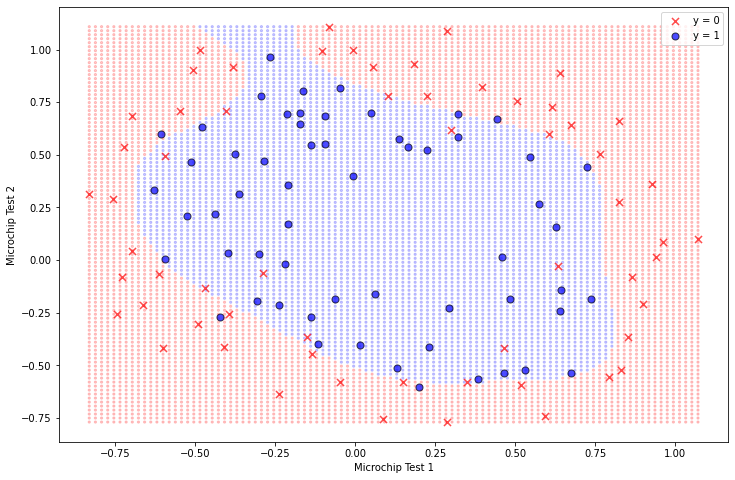

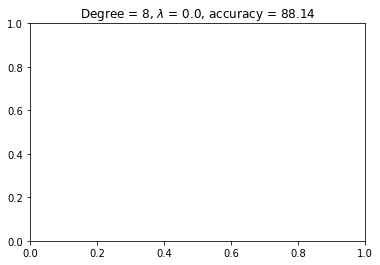

In [60]:

# plot decision boundary
title = "Degree = {}, $\lambda$ = {}, accuracy = {:.2f}".format(degree, reg, acc)
plot_decision_boundary(theta_opt, X_poly, y.ravel(), 
                       xlabel='Microchip Test 1', ylabel='Microchip Test 2',
                       degree=degree, title=title)